# DRIVEN DATA : Predict H1N1 and Seasonal Flu Vaccines

https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

Dictionnaire de donéee

 "Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines" sur DrivenData vise à prédire si les gens ont été vaccinés contre la grippe H1N1 et la grippe saisonnière en utilisant des informations partagées sur leur background, opinions et comportements de santé. 

In [1]:
import pandas as pd
training_set_feature = pd.read_csv('training_set_features.csv')
training_set_label = pd.read_csv('training_set_labels.csv')
training_set_feature.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [2]:
import pandas as pd

def chargement_csv(chemin_fichier1, chemin_fichier2):
    """
    Fusionne deux fichiers CSV en un seul DataFrame.

    Args:
    chemin_fichier1 (str): Chemin vers le premier fichier CSV.
    chemin_fichier2 (str): Chemin vers le second fichier CSV.

    Returns:
    pd.DataFrame: Un DataFrame résultant de la fusion des deux fichiers CSV.
    """
    try:
        # Lecture des fichiers CSV
        df1 = pd.read_csv(chemin_fichier1)
        df2 = pd.read_csv(chemin_fichier2)

        # Fusion des DataFrames
        df_f = pd.merge(df1, df2, on='respondent_id')

        return df_f

    except pd.errors.EmptyDataError:
        print("Erreur : L'un des fichiers CSV est vide.")
    except pd.errors.ParserError:
        print("Erreur : Erreur de parsing dans l'un des fichiers CSV.")
    except FileNotFoundError:
        print("Erreur : L'un des fichiers spécifiés n'a pas été trouvé.")
    except Exception as e:
        print(f"Une erreur inattendue s'est produite : {e}")

    return None

In [3]:
df = chargement_csv('training_set_features.csv','training_set_labels.csv')

In [4]:
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


# Fonction pour statistiques descriptives

La fonction n'est pas parfaite, le but est de faire quelque chose d'industriel pouvant décrire un dataframe peut importe le nombre de variable et le type des colonnes étudiées

In [5]:
import pandas as pd

def descriptive_stats(df):
    results = pd.DataFrame()

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Statistiques pour les colonnes numériques
            stats = {
                'Moyenne': df[col].mean(),
                'Médiane': df[col].median(),
                'Ecart-type': df[col].std(),
                'Min': df[col].min(),
                'Max': df[col].max()
            }
        elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
            # Statistiques pour les colonnes catégoriques
            top_freq = df[col].value_counts().idxmax()
            top_freq_count = df[col].value_counts().max()
            stats = {
                'Nombre unique': df[col].nunique(),
                'Top catégorie': top_freq,
                'Fréquence Top catégorie': top_freq_count
            }
        else:
            # Pour les autres types de données, vous pouvez ajouter plus de conditions ici
            stats = {}

        results[col] = pd.Series(stats)

    return results


In [6]:
print(descriptive_stats(df))

            respondent_id  h1n1_concern  h1n1_knowledge  \
Moyenne      13353.000000      1.618486        1.262532   
Médiane      13353.000000      2.000000        1.000000   
Ecart-type    7709.791156      0.910311        0.618149   
Min              0.000000      0.000000        0.000000   
Max          26706.000000      3.000000        2.000000   

            behavioral_antiviral_meds  behavioral_avoidance  \
Moyenne                      0.048844              0.725612   
Médiane                      0.000000              1.000000   
Ecart-type                   0.215545              0.446214   
Min                          0.000000              0.000000   
Max                          1.000000              1.000000   

            behavioral_face_mask  behavioral_wash_hands  \
Moyenne                 0.068982               0.825614   
Médiane                 0.000000               1.000000   
Ecart-type              0.253429               0.379448   
Min                     0.0000

## Visuels pour statistiques descriptives

Les fonctions ne sont pas parfaites, dans le sens ou elles peuvent parfois s’appliquer a des caractéristiques qui ne sont pas représentables sur tous les graphiques. Comme pour la fonction statistique descriptive, l'objectif de ces fonction est de pouvoir représenter visualiser un dataframe peut importe les types de colonnes et le nombre de celles-ci

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df):
    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogramme de {col}')
        plt.show()

def plot_boxplots(df):
    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()

def plot_bar_charts(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        sns.countplot(y=df[col])
        plt.title(f'Fréquences des catégories dans {col}')
        plt.show()

def plot_pie_charts(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        df[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f'Répartition des catégories dans {col}')
        plt.ylabel('')
        plt.show()

def plot_correlation_matrix(df):
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Matrice de Corrélation')
    plt.show()



### Appel des fonctions

In [8]:
#plot_boxplots(df)
#plot_histograms(df)
#plot_bar_charts(df)
#plot_pie_charts(df)
#plot_correlation_matrix(df)

# Nettoyage des données


employment_industry
employment_occupation
hhs_geo_region

Ces 3 colonnes sont anonymisées, nous prenons donc la décision de supprimer ces variables car peu interprétables 

In [9]:

df = df.drop(['employment_industry','employment_occupation','hhs_geo_region'], axis = 1)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Le dataframe présente des valeurs manquantes, on décide de supprimer ces observations. Cependant, pour ne pas perdre trop d'observations, nous prenons soins de remplacer les valeur manquantes de la variable health_insurance par 0 étant donnée que cette variable compte près de 10 000 observations manquantes

In [11]:
#beaucoup de vide dans cette colonne, on considere vide = a pas d'assurance donc 0
df['health_insurance'] = df['health_insurance'].fillna(0)

In [12]:
#On supprime les vides
df_cleaned = df.dropna()

# Affichage des informations du DataFrame nettoyé pour confirmer la suppression
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19642 non-null  int64  
 1   h1n1_concern                 19642 non-null  float64
 2   h1n1_knowledge               19642 non-null  float64
 3   behavioral_antiviral_meds    19642 non-null  float64
 4   behavioral_avoidance         19642 non-null  float64
 5   behavioral_face_mask         19642 non-null  float64
 6   behavioral_wash_hands        19642 non-null  float64
 7   behavioral_large_gatherings  19642 non-null  float64
 8   behavioral_outside_home      19642 non-null  float64
 9   behavioral_touch_face        19642 non-null  float64
 10  doctor_recc_h1n1             19642 non-null  float64
 11  doctor_recc_seasonal         19642 non-null  float64
 12  chronic_med_condition        19642 non-null  float64
 13  child_under_6_mo

on passe de 26000obs a 19000 mais plus de vides.

In [13]:
df = df_cleaned

# Sélection de variables

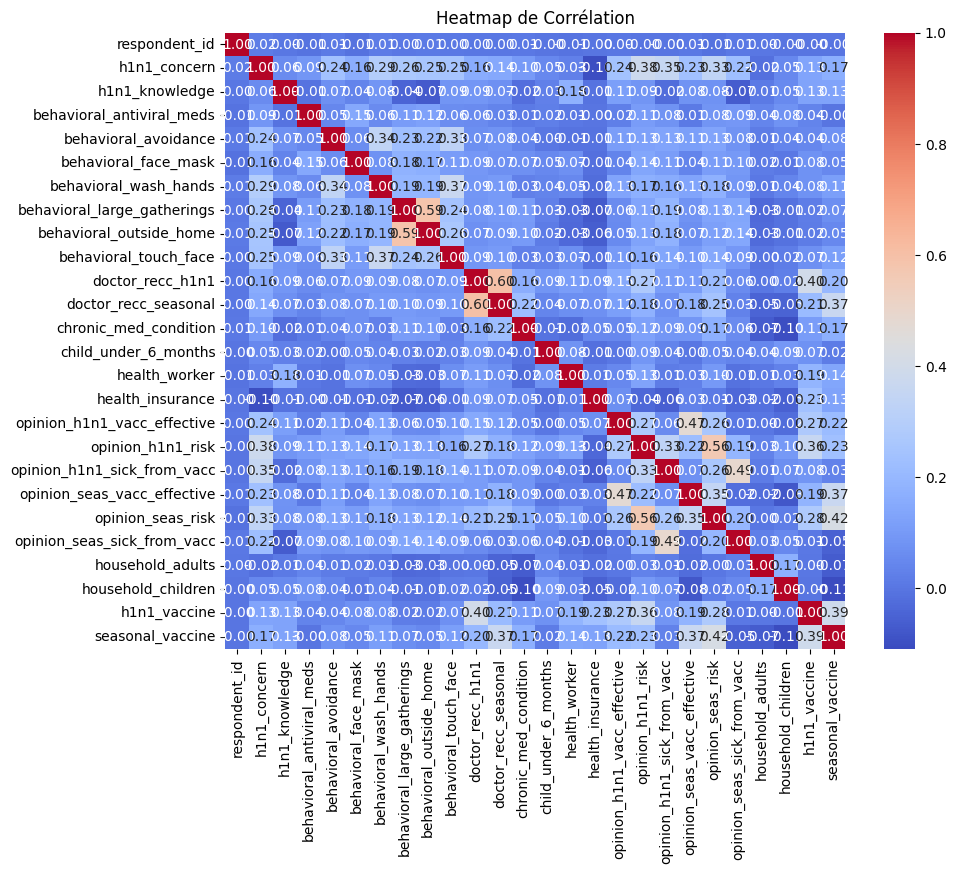

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Utiliser seaborn pour créer la heatmap
plt.figure(figsize=(10, 8))  # Vous pouvez ajuster la taille selon vos besoins
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Afficher le titre et le graphique
plt.title('Heatmap de Corrélation')
plt.show()

# Variables Numériques

<img src="image-20231217-103752.png" width="" align="" />

In [15]:

df['doctor_recc_h1n1'] = df['doctor_recc_h1n1'].fillna(0)
df['doctor_recc_seasonal'] = df['doctor_recc_seasonal'].fillna(0)

In [16]:
df['doctor_recc_combined'] = df['doctor_recc_h1n1'] + df['doctor_recc_seasonal']
df['doctor_recc_combined'] = df['doctor_recc_combined'].replace(2, 1)


In [17]:
df.drop(['doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_seas_risk', 'behavioral_outside_home'], axis=1, inplace=True)


In [18]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,chronic_med_condition,...,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,doctor_recc_combined
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1,1.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0,1.0


# Variables Qualitatives

In [19]:
import scipy.stats as ss
import numpy as np

# Définition de la fonction cramers_v
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Supposons que `df` est votre DataFrame

# Sélection des variables qualitatives
categorical_cols = df.select_dtypes(include=['object']).columns

# Calcul de la matrice de corrélation de Cramér V pour les variables qualitatives
cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Affichage de la matrice des corrélations de Cramér V
cramers_matrix.astype(float)

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
age_group,1.000000,0.083346,0.104672,0.053359,0.185030,0.182952,0.266235,0.362238,0.056506
education,0.083346,1.000000,0.117975,0.040508,0.318832,0.143781,0.181582,0.152549,0.106628
race,0.104672,0.117975,1.000000,0.039800,0.170192,0.142852,0.227302,0.064275,0.104864
sex,0.053359,0.040508,0.039800,0.999895,0.077301,0.047057,0.019888,0.123862,0.015156
income_poverty,0.185030,0.318832,0.170192,0.077301,1.000000,0.329925,0.341805,0.211055,0.090327
marital_status,0.182952,0.143781,0.142852,0.047057,0.329925,0.999897,0.288999,0.111189,0.088799
rent_or_own,0.266235,0.181582,0.227302,0.019888,0.341805,0.288999,0.999859,0.106886,0.130049
employment_status,0.362238,0.152549,0.064275,0.123862,0.211055,0.111189,0.106886,1.000000,0.033485
census_msa,0.056506,0.106628,0.104864,0.015156,0.090327,0.088799,0.130049,0.033485,1.000000


Pas de corrélation forte

# Sélection de variables : Random Forest

On souhaite réduire le nombre de variables pour notre modèle final. Pour ce faire, nous allons réaliser un Random Forest afin de sélectionner les 10 variables les plus importantes. Ces 10 variables constitueront le dataframe que nous utiliserons pour le modèle final

## Mise en forme des données pour Random Forest

In [20]:
from sklearn.preprocessing import LabelEncoder

# Créez une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquez l'encodage à une variable catégorielle (par exemple, la variable 'age_group')
df['age_group_encoded'] = label_encoder.fit_transform(df['age_group'])
df = df.drop('age_group', axis = 1)

In [21]:
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,chronic_med_condition,...,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,doctor_recc_combined,age_group_encoded
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0,0.0,3
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1,0.0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1,1.0,4
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0,0.0,2
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0,1,1.0,3
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0,0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0,0.0,4
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0,0,1.0,0


In [22]:
df['education_encoded'] = label_encoder.fit_transform(df['education'])


df = df.drop('education', axis = 1)

In [23]:
df['race_encoded'] = label_encoder.fit_transform(df['race'])
df = df.drop('race', axis = 1)

In [24]:
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df = df.drop('sex', axis = 1)

In [25]:
df['income_poverty_encoded'] = label_encoder.fit_transform(df['income_poverty'])
df = df.drop('income_poverty', axis = 1)

In [26]:
df['marital_status_encoded'] = label_encoder.fit_transform(df['marital_status'])
df = df.drop('marital_status', axis = 1)

In [27]:
df['rent_or_own_encoded'] = label_encoder.fit_transform(df['rent_or_own'])
df = df.drop('rent_or_own', axis = 1)

In [28]:
df['employment_status_encoded'] = label_encoder.fit_transform(df['employment_status'])
df = df.drop('employment_status', axis = 1)

In [29]:
df['census_msa_encoded'] = label_encoder.fit_transform(df['census_msa'])
df = df.drop('census_msa', axis = 1)

In [30]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,chronic_med_condition,...,doctor_recc_combined,age_group_encoded,education_encoded,race_encoded,sex_encoded,income_poverty_encoded,marital_status_encoded,rent_or_own_encoded,employment_status_encoded,census_msa_encoded
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3,1,3,0,2,1,0,1,2
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1,0,3,1,2,1,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,4,0,3,0,2,1,1,1,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2,3,3,0,0,0,0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,4,0,3,1,0,0,0,0,1


## Split des données pour Random Forest

In [31]:
X_train = df.drop(['h1n1_vaccine', 'seasonal_vaccine','respondent_id'], axis=1)
y_train = df[['h1n1_vaccine', 'seasonal_vaccine']]


In [32]:
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,doctor_recc_combined,age_group_encoded,education_encoded,race_encoded,sex_encoded,income_poverty_encoded,marital_status_encoded,rent_or_own_encoded,employment_status_encoded,census_msa_encoded
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3,1,3,0,2,1,0,1,2
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1,0,3,1,2,1,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,4,0,3,0,2,1,1,1,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,2,3,3,0,0,0,0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,4,0,3,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,3,0,3,0,1,0,0,1,1
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0,2,3,0,1,1,1,1,1
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4,3,3,0,0,1,0,1,2
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0,2,3,1,0,1,1,0,1


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
# on entraine le modèle sur les données
rf.fit(X_train, y_train) 

# on récupère les variables importantes
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
top10 = feature_importances.head(10)
# Affichage des variables les plus importantes
print(feature_importances.head(10))

                        Feature  Importance
15  opinion_seas_vacc_effective    0.084351
13            opinion_h1n1_risk    0.081237
20            age_group_encoded    0.065123
19         doctor_recc_combined    0.061063
12  opinion_h1n1_vacc_effective    0.055530
14  opinion_h1n1_sick_from_vacc    0.044616
21            education_encoded    0.044324
16  opinion_seas_sick_from_vacc    0.043295
0                  h1n1_concern    0.042858
28           census_msa_encoded    0.040942


In [34]:
top10

,Feature,Importance
15,opinion_seas_vacc_effective,0.084351
13,opinion_h1n1_risk,0.081237
20,age_group_encoded,0.065123
19,doctor_recc_combined,0.061063
12,opinion_h1n1_vacc_effective,0.055530
14,opinion_h1n1_sick_from_vacc,0.044616
21,education_encoded,0.044324
16,opinion_seas_sick_from_vacc,0.043295
0,h1n1_concern,0.042858
28,census_msa_encoded,0.040942


On crée le dataframe avec les 10 variables les plus importantes

In [35]:
important_vars = top10.iloc[:, 0].tolist()

# Sélectionner ces colonnes dans le DataFrame original
df_important = df[important_vars]
df_important

,opinion_seas_vacc_effective,opinion_h1n1_risk,age_group_encoded,doctor_recc_combined,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc,education_encoded,opinion_seas_sick_from_vacc,h1n1_concern,census_msa_encoded
0,2.0,1.0,3,0.0,3.0,2.0,1,2.0,1.0,2
1,4.0,4.0,1,0.0,5.0,4.0,0,4.0,3.0,0
3,5.0,3.0,4,1.0,3.0,5.0,0,1.0,1.0,1
4,3.0,3.0,2,0.0,3.0,2.0,3,4.0,2.0,0
5,5.0,2.0,4,1.0,5.0,1.0,0,4.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
26700,5.0,2.0,3,1.0,4.0,5.0,0,5.0,3.0,1
26701,4.0,2.0,0,0.0,4.0,4.0,2,4.0,2.0,1
26702,5.0,1.0,4,0.0,3.0,1.0,3,2.0,2.0,2
26703,5.0,2.0,0,1.0,4.0,2.0,2,1.0,1.0,1


In [36]:
#Sauvergarde, pour limiter les éxécutions
df_important.to_csv('df_important_save.csv', index=False)

# Régressions logistique 

In [37]:
df_regLog = pd.read_csv('df_important_save.csv')
#df_regLog = pd.merge(df_regLog, y_train,on='respondent_id')
#df_regLog['respondant_id'] = df['respondent_id']
#df_regLog 
#df['respondent_id']

## On passe les variables en dummies pour le modèle

In [38]:
for col in df_regLog :
    df_regLog[col] = df_regLog[col].astype('category')

In [39]:
df_regLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   opinion_seas_vacc_effective  19642 non-null  category
 1   opinion_h1n1_risk            19642 non-null  category
 2   age_group_encoded            19642 non-null  category
 3   doctor_recc_combined         19642 non-null  category
 4   opinion_h1n1_vacc_effective  19642 non-null  category
 5   opinion_h1n1_sick_from_vacc  19642 non-null  category
 6   education_encoded            19642 non-null  category
 7   opinion_seas_sick_from_vacc  19642 non-null  category
 8   h1n1_concern                 19642 non-null  category
 9   census_msa_encoded           19642 non-null  category
dtypes: category(10)
memory usage: 193.8 KB


In [40]:
df_dummiesReg = pd.get_dummies(df_regLog)

In [41]:
df_dummiesReg

,opinion_seas_vacc_effective_1.0,opinion_seas_vacc_effective_2.0,opinion_seas_vacc_effective_3.0,opinion_seas_vacc_effective_4.0,opinion_seas_vacc_effective_5.0,opinion_h1n1_risk_1.0,opinion_h1n1_risk_2.0,opinion_h1n1_risk_3.0,opinion_h1n1_risk_4.0,opinion_h1n1_risk_5.0,...,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,census_msa_encoded_0,census_msa_encoded_1,census_msa_encoded_2
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19637,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
19638,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
19639,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
19640,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## On rassemble les données précédemment splitées, cela nous permettrait de faire un jeu d'entrainement et un jeu de test sur le modèle final

In [42]:
y_train = y_train.reset_index(drop=True) #reset de l'indexcar join impossible sinon
df_dummiesReg['h1n1_vaccine'] =y_train['h1n1_vaccine'] 
df_dummiesReg['seasonal_vaccine'] =y_train['seasonal_vaccine'] 


In [43]:
df_dummiesReg
#a suppirmer variable deja en dummie recoder en dummi
#doctor_recc_combined_0.0

,opinion_seas_vacc_effective_1.0,opinion_seas_vacc_effective_2.0,opinion_seas_vacc_effective_3.0,opinion_seas_vacc_effective_4.0,opinion_seas_vacc_effective_5.0,opinion_h1n1_risk_1.0,opinion_h1n1_risk_2.0,opinion_h1n1_risk_3.0,opinion_h1n1_risk_4.0,opinion_h1n1_risk_5.0,...,opinion_seas_sick_from_vacc_5.0,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,census_msa_encoded_0,census_msa_encoded_1,census_msa_encoded_2,h1n1_vaccine,seasonal_vaccine
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19637,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
19638,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
19639,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
19640,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [44]:
df_dummiesReg = df_dummiesReg.drop('doctor_recc_combined_0.0', axis = 1)

In [45]:
df_dummiesReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   opinion_seas_vacc_effective_1.0  19642 non-null  uint8
 1   opinion_seas_vacc_effective_2.0  19642 non-null  uint8
 2   opinion_seas_vacc_effective_3.0  19642 non-null  uint8
 3   opinion_seas_vacc_effective_4.0  19642 non-null  uint8
 4   opinion_seas_vacc_effective_5.0  19642 non-null  uint8
 5   opinion_h1n1_risk_1.0            19642 non-null  uint8
 6   opinion_h1n1_risk_2.0            19642 non-null  uint8
 7   opinion_h1n1_risk_3.0            19642 non-null  uint8
 8   opinion_h1n1_risk_4.0            19642 non-null  uint8
 9   opinion_h1n1_risk_5.0            19642 non-null  uint8
 10  age_group_encoded_0              19642 non-null  uint8
 11  age_group_encoded_1              19642 non-null  uint8
 12  age_group_encoded_2              19642 non-nul

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix


In [52]:
def models_Logistic_Regression(df_rlm):
    # Séparer les caractéristiques et les variables cibles
    X = df_rlm.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
    y_h1n1 = df_rlm['h1n1_vaccine']
    y_seasonal = df_rlm['seasonal_vaccine']

    # Division des données pour chaque cible
    X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
    X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

    # Création et entraînement des modèles de régression logistique
    model_h1n1 = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    model_seasonal = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

    model_h1n1.fit(X_train_h1n1, y_train_h1n1)
    model_seasonal.fit(X_train_seasonal, y_train_seasonal)

    # Prédiction des résultats sur les ensembles de test
    predictions_h1n1 = model_h1n1.predict(X_test_h1n1)
    predictions_seasonal = model_seasonal.predict(X_test_seasonal)

###

    # Calculer les probabilités de prédiction pour la courbe ROC
    probabilities_h1n1 = model_h1n1.predict_proba(X_test_h1n1)[:, 1]
    probabilities_seasonal = model_seasonal.predict_proba(X_test_seasonal)[:, 1]

    # Calculer les scores AUC
    auc_h1n1 = roc_auc_score(y_test_h1n1, probabilities_h1n1)
    auc_seasonal = roc_auc_score(y_test_seasonal, probabilities_seasonal)

    # Afficher la courbe ROC
    fpr_h1n1, tpr_h1n1, _ = roc_curve(y_test_h1n1, probabilities_h1n1)
    fpr_seasonal, tpr_seasonal, _ = roc_curve(y_test_seasonal, probabilities_seasonal)

    plt.figure(figsize=(12, 6))
    plt.plot(fpr_h1n1, tpr_h1n1, label=f'h1n1_vaccine AUC: {auc_h1n1:.2f}')
    plt.plot(fpr_seasonal, tpr_seasonal, label=f'seasonal_vaccine AUC: {auc_seasonal:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Afficher la matrice de confusion
    cm_h1n1 = confusion_matrix(y_test_h1n1, predictions_h1n1)
    cm_seasonal = confusion_matrix(y_test_seasonal, predictions_seasonal)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm_h1n1, annot=True, fmt='g', ax=ax[0])
    ax[0].set_title('Confusion Matrix for h1n1_vaccine')
    ax[0].set_xlabel('Predicted Labels')
    ax[0].set_ylabel('True Labels')

    sns.heatmap(cm_seasonal, annot=True, fmt='g', ax=ax[1])
    ax[1].set_title('Confusion Matrix for seasonal_vaccine')
    ax[1].set_xlabel('Predicted Labels')
    ax[1].set_ylabel('True Labels')
    plt.show() 
###
    # Évaluation des modèles
    print("Évaluation pour h1n1_vaccine:")
    print(classification_report(y_test_h1n1, predictions_h1n1))

    print("Évaluation pour seasonal_vaccine:")
    print(classification_report(y_test_seasonal, predictions_seasonal))
    return 


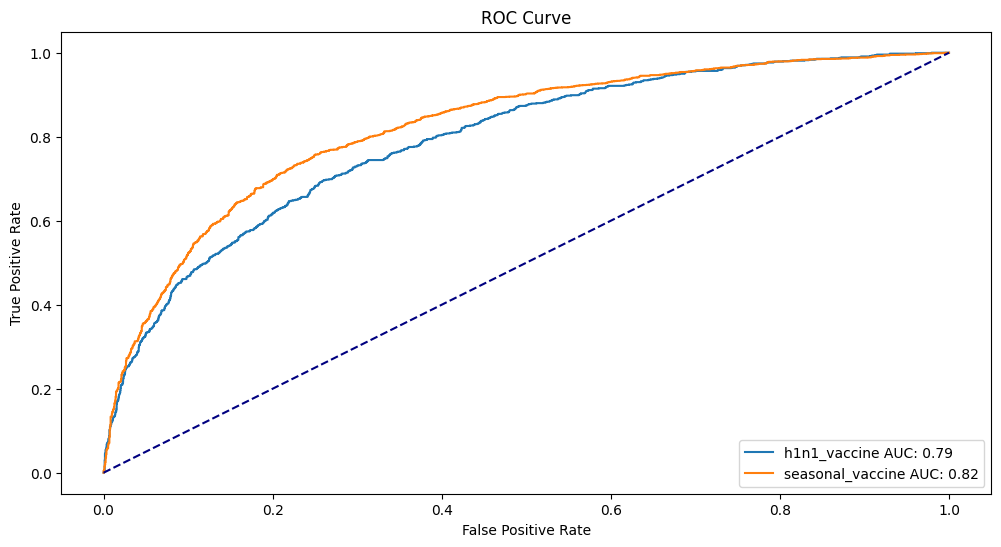

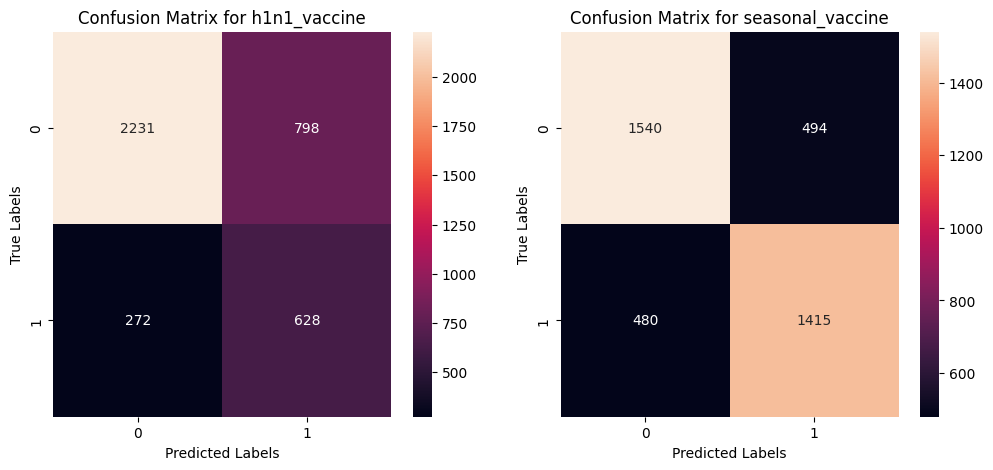

Évaluation pour h1n1_vaccine:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      3029
           1       0.44      0.70      0.54       900

    accuracy                           0.73      3929
   macro avg       0.67      0.72      0.67      3929
weighted avg       0.79      0.73      0.75      3929

Évaluation pour seasonal_vaccine:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2034
           1       0.74      0.75      0.74      1895

    accuracy                           0.75      3929
   macro avg       0.75      0.75      0.75      3929
weighted avg       0.75      0.75      0.75      3929



In [53]:
models_Logistic_Regression(df_dummiesReg)

In [ ]:
def models_Logistic_Regression(df_rlm):
    with mlflow.start_run(run_name="Logistic Regression Models"):
        # Séparer les caractéristiques et les variables cibles
        X = df_rlm.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
        y_h1n1 = df_rlm['h1n1_vaccine']
        y_seasonal = df_rlm['seasonal_vaccine']

        # Division des données pour chaque cible
        X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
        X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

        # Création et entraînement des modèles de régression logistique
        model_h1n1 = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
        model_seasonal = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

        model_h1n1.fit(X_train_h1n1, y_train_h1n1)
        model_seasonal.fit(X_train_seasonal, y_train_seasonal)

        # Enregistrement des modèles
        mlflow.sklearn.log_model(model_h1n1, "model_h1n1")
        mlflow.sklearn.log_model(model_seasonal, "model_seasonal")

        # Prédiction et évaluation des résultats sur les ensembles de test
        predictions_h1n1 = model_h1n1.predict(X_test_h1n1)
        predictions_seasonal = model_seasonal.predict(X_test_seasonal)
        acc_h1n1 = accuracy_score(y_test_h1n1, predictions_h1n1)
        acc_seasonal = accuracy_score(y_test_seasonal, predictions_seasonal)
        auc_h1n1 = roc_auc_score(y_test_h1n1, model_h1n1.predict_proba(X_test_h1n1)[:, 1])
        auc_seasonal = roc_auc_score(y_test_seasonal, model_seasonal.predict_proba(X_test_seasonal)[:, 1])

        # Enregistrement des métriques
        mlflow.log_metric("accuracy_h1n1", acc_h1n1)
        mlflow.log_metric("accuracy_seasonal", acc_seasonal)
        mlflow.log_metric("auc_h1n1", auc_h1n1)
        mlflow.log_metric("auc_seasonal", auc_seasonal)

        # Enregistrement des rapports de classification
        report_h1n1 = classification_report(y_test_h1n1, predictions_h1n1)
        report_seasonal = classification_report(y_test_seasonal, predictions_seasonal)
        mlflow.log_text(report_h1n1, "classification_report_h1n1.txt")
        mlflow.log_text(report_seasonal, "classification_report_seasonal.txt")

        print("Évaluation pour h1n1_vaccine:")
        print(report_h1n1)
        print("Évaluation pour seasonal_vaccine:")
        print(report_seasonal)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=029b32ea-4b45-4aac-a053-fdf34162e9b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>